<a href="https://colab.research.google.com/github/lsternlicht/2019-wuhan-coronavirus-data/blob/master/200609_corona_log_scale_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


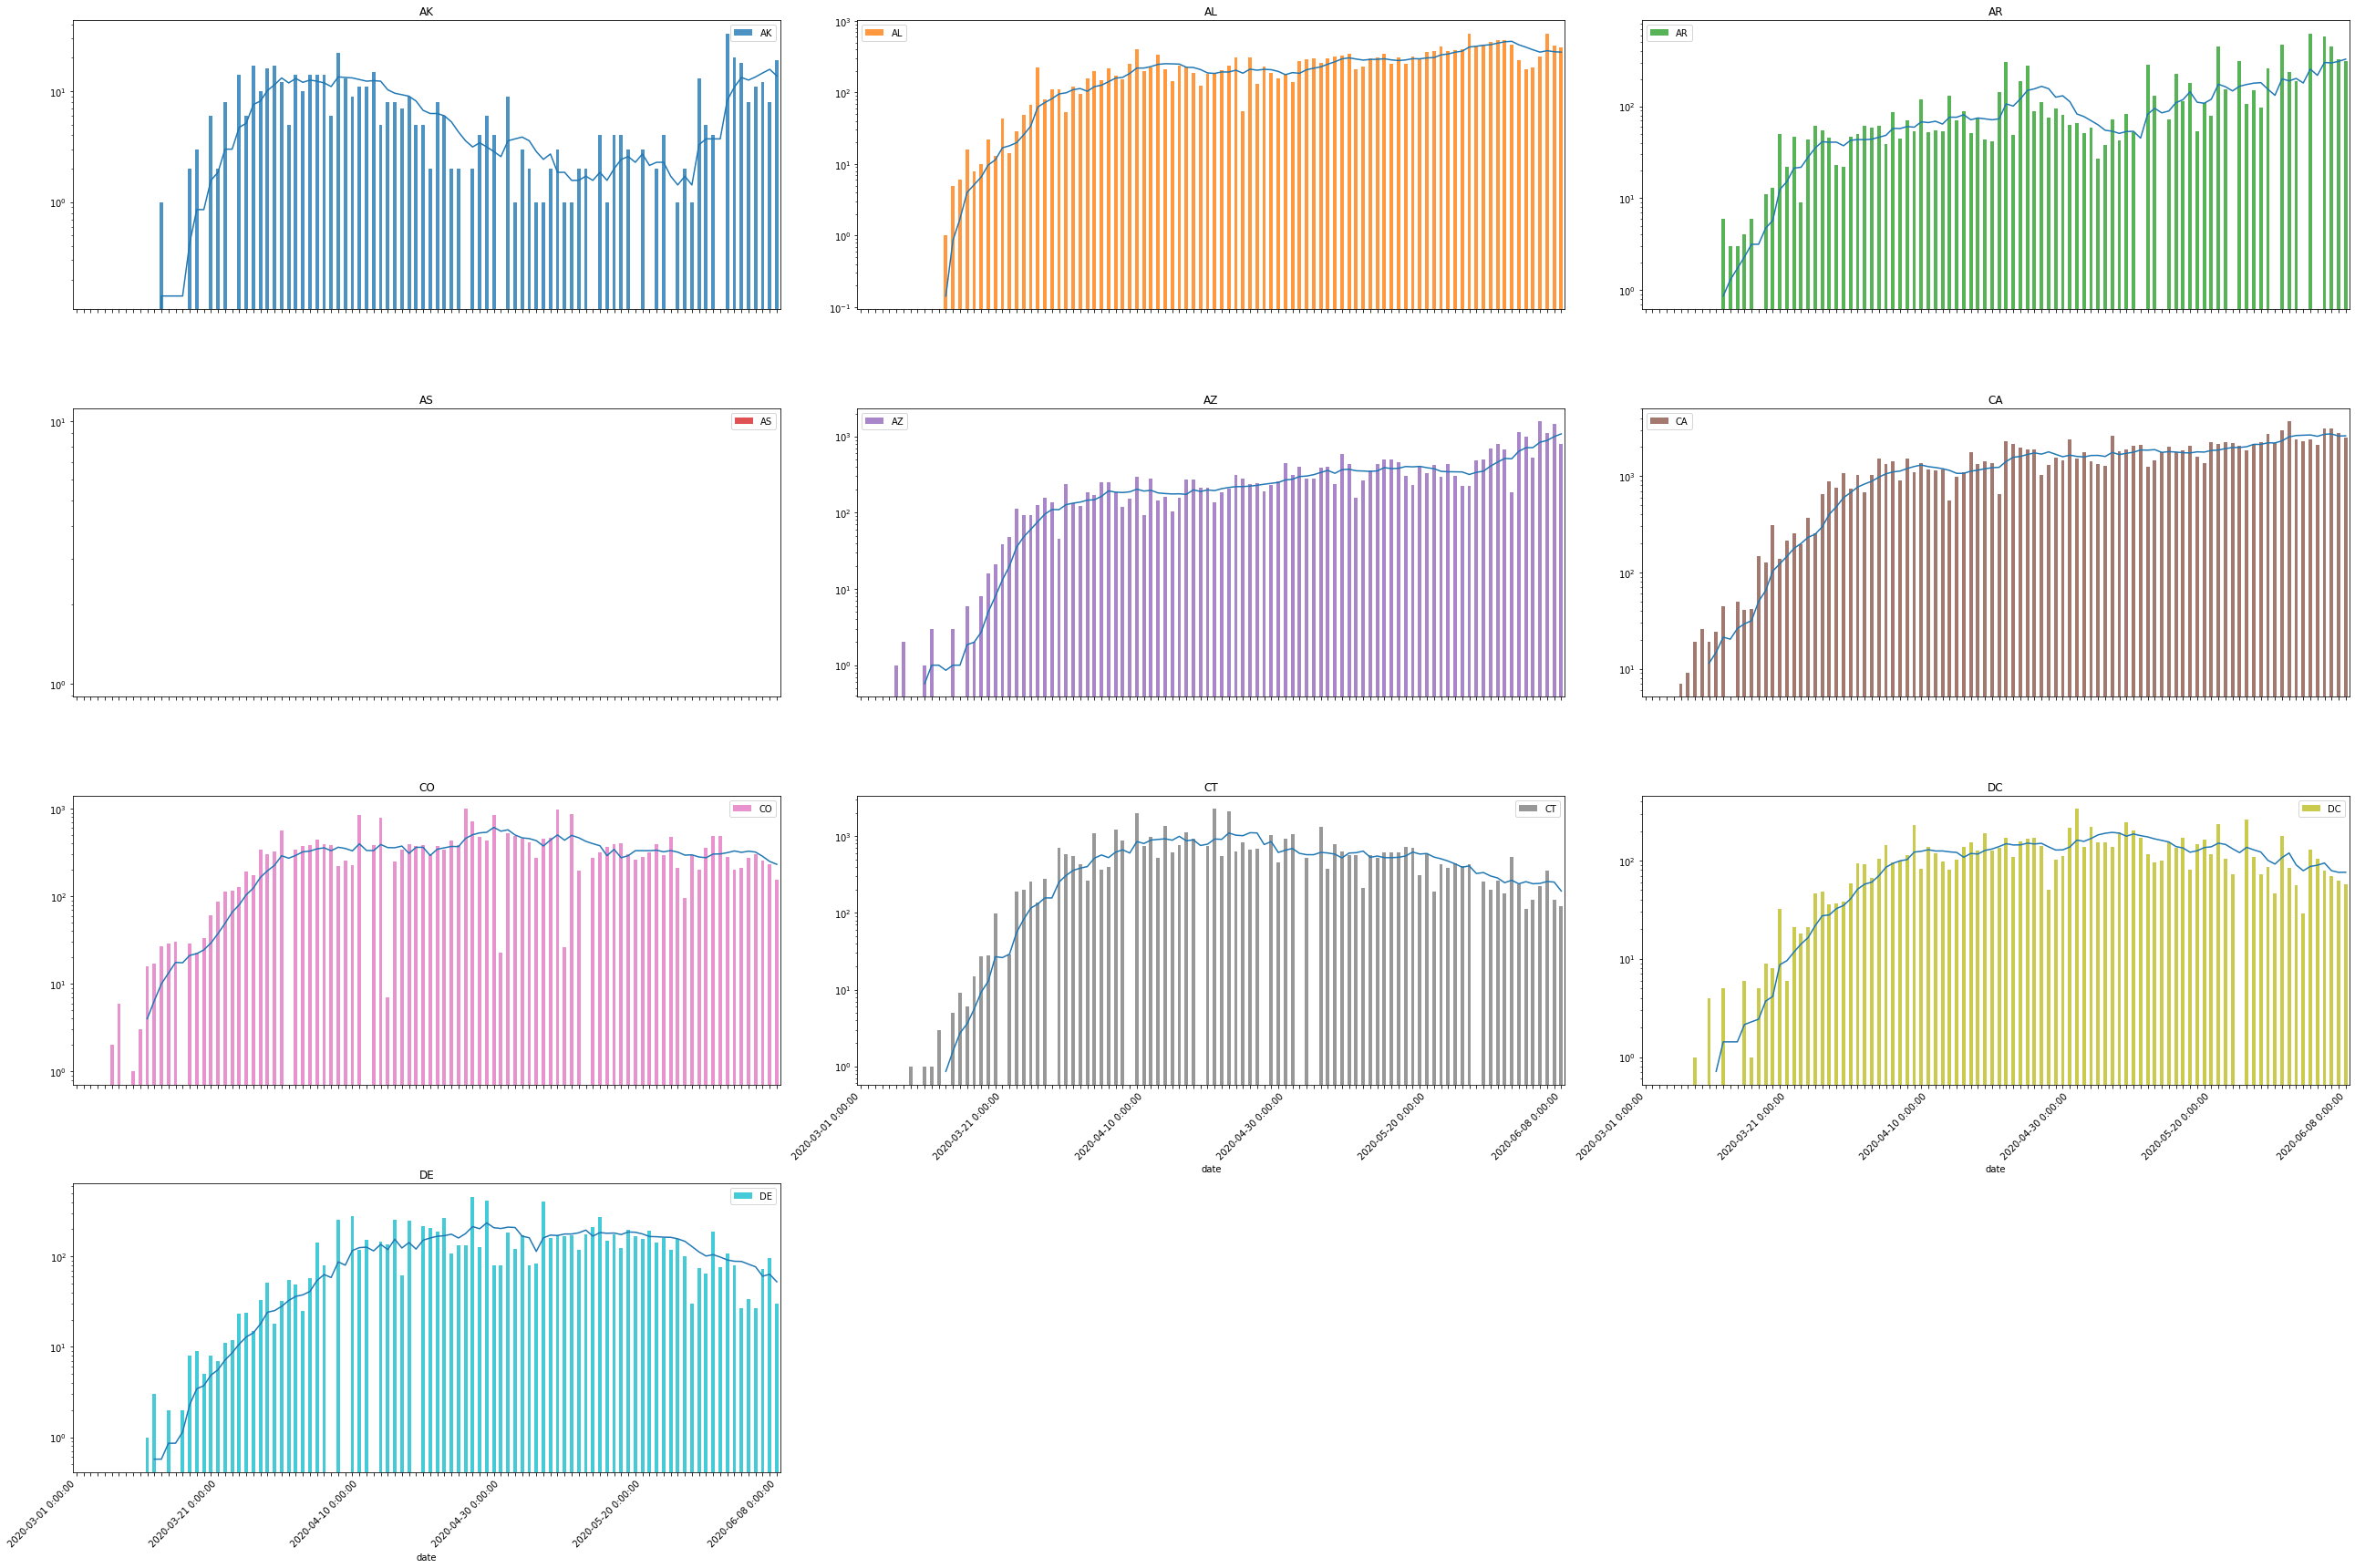

In [11]:
import math
import io
import httpx
import pandas as pd
import matplotlib.pyplot as plt


NSTATES = 10
NCOLS=3
NROLLING = 7
MINDATE = '2020-03-01'

URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQVn-SEz4ZBbuDlG70jehFP3i6JnFhxm4EtsrgZ88KvmSHN1k4woJI49DTrxzZbBiIDmTZTpAig9nVX/pub?gid=794287898&single=true&output=csv'


def auto_get_data(url=None):
    ''' grabs the data froom google sheet
    
    note:
        - alternatively could open up google sheet in browser, highlight all cells, and then run python command: `df = pd.read_clipboard()`
    '''
    
    if url is None:
        url = URL
    
    r = httpx.get(url)
    data = r.content.decode('ascii')
    df = pd.read_csv(io.StringIO(data))
    return df


def format_and_reshape(df, fld='positiveIncrease'):
    df = df.copy()
    try:
        df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    except:
        pass
    df1 = df.sort_values(by='date').set_index(['state', 'date'])[fld].reset_index().pivot(columns='state', index='date', values=fld)
    return df1

df = auto_get_data()
#df = pd.read_clipboard()    # use this if not on local network with chrome browser cookies for sheet or `auto_get_data` does not work

df1 = format_and_reshape(df, fld='positiveIncrease')
df1 = df1.pipe(lambda x: x[x.index > MINDATE])
df2 = df1.rolling(NROLLING).mean()
axes = df1.iloc[:, :NSTATES].pipe(lambda x: x.plot(alpha=0.8, kind='bar', subplots=True, layout=(-1, NCOLS), figsize=(12*NCOLS, 6* math.ceil(x.shape[1] / NCOLS) )))
axes = axes.ravel()
[ax.plot(df2.iloc[:, k]) for k,ax in enumerate(axes)]
[ax.set_yscale('log') for ax in axes]
xlabels = axes[-1].get_xticklabels()
[ax.set_xticklabels([i.get_text() if (k % 20) == 0 or (k + 1) ==  len(xlabels) else '' for k,i in enumerate(xlabels)], rotation=45, ha='right') for ax in axes]
plt.tight_layout()
